# USA New Jersey House Price Predictions

Nama : Ageng Cahyo Widjaya

NIM : 00000063582

(IS388-DL) Data Analysis - LAB

## Import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
# link dataset = https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

df = pd.read_csv("realtor-data.csv")
df['state'] = df['state'].astype('category')
df = df.query("state == 'New Jersey'")
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
30126,for_sale,333490.0,3.0,3.0,0.07,"Katherine, Burlington, NJ, 08016",Katherine,Burlington,New Jersey,8016.0,1500.0,NaN
45320,for_sale,333490.0,3.0,3.0,0.07,"Katherine, Burlington, NJ, 08016",Katherine,Burlington,New Jersey,8016.0,1500.0,NaN
385082,for_sale,333490.0,3.0,3.0,0.07,"Katherine, Burlington, NJ, 08016",Katherine,Burlington,New Jersey,8016.0,1500.0,NaN
388797,for_sale,333490.0,3.0,3.0,0.07,"Katherine, Burlington, NJ, 08016",Katherine,Burlington,New Jersey,8016.0,1500.0,NaN
389915,for_sale,333490.0,3.0,3.0,0.07,"Katherine, Burlington, NJ, 08016",Katherine,Burlington,New Jersey,8016.0,1500.0,NaN


In [3]:
df.shape

(233722, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233722 entries, 30126 to 923131
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   status        233722 non-null  object  
 1   price         233657 non-null  float64 
 2   bed           219812 non-null  float64 
 3   bath          218895 non-null  float64 
 4   acre_lot      178880 non-null  float64 
 5   full_address  233722 non-null  object  
 6   street        233581 non-null  object  
 7   city          233704 non-null  object  
 8   state         233722 non-null  category
 9   zip_code      233722 non-null  float64 
 10  house_size    102807 non-null  float64 
 11  sold_date     152044 non-null  object  
dtypes: category(1), float64(6), object(5)
memory usage: 21.6+ MB


## Data Preparation

In [5]:
df.isnull().sum()

status               0
price               65
bed              13910
bath             14827
acre_lot         54842
full_address         0
street             141
city                18
state                0
zip_code             0
house_size      130915
sold_date        81678
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

status          0
price           0
bed             0
bath            0
acre_lot        0
full_address    0
street          0
city            0
state           0
zip_code        0
house_size      0
sold_date       0
dtype: int64

In [7]:
df["sold_date"]= pd.to_datetime(df["sold_date"])
df["sold_year"] = df['sold_date'].dt.year

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54094 entries, 463568 to 922595
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   status        54094 non-null  object        
 1   price         54094 non-null  float64       
 2   bed           54094 non-null  float64       
 3   bath          54094 non-null  float64       
 4   acre_lot      54094 non-null  float64       
 5   full_address  54094 non-null  object        
 6   street        54094 non-null  object        
 7   city          54094 non-null  object        
 8   state         54094 non-null  category      
 9   zip_code      54094 non-null  float64       
 10  house_size    54094 non-null  float64       
 11  sold_date     54094 non-null  datetime64[ns]
 12  sold_year     54094 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 5.4+ MB


In [8]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,sold_year
463568,for_sale,339900.0,2.0,2.0,0.11,"29 Meinzer St, Avenel, NJ, 07001",29 Meinzer St,Avenel,New Jersey,7001.0,1456.0,1987-05-20,1987
463569,for_sale,305100.0,3.0,2.0,0.14,"1150 Rahway Ave, Avenel, NJ, 07001",1150 Rahway Ave,Avenel,New Jersey,7001.0,1542.0,2022-01-27,2022
463572,for_sale,325000.0,3.0,3.0,0.15,"52 Westside Ave, Avenel, NJ, 07001",52 Westside Ave,Avenel,New Jersey,7001.0,1870.0,2002-12-17,2002
463575,for_sale,440000.0,4.0,2.0,0.17,"275 Prospect Ave, Avenel, NJ, 07001",275 Prospect Ave,Avenel,New Jersey,7001.0,1842.0,2015-11-23,2015
463577,for_sale,399000.0,3.0,3.0,0.06,"1188 Rahway Ave, Avenel, NJ, 07001",1188 Rahway Ave,Avenel,New Jersey,7001.0,1476.0,1990-02-28,1990


In [9]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

df2 = remove_outliers(df, [['price', 'bed', 'bath', 'acre_lot', 'house_size', 'sold_year']], 3)
df2[['price', 'bed', 'bath', 'acre_lot', 'house_size', 'sold_year']].head()

Working on column: ['price', 'bed', 'bath', 'acre_lot', 'house_size', 'sold_year']


,price,bed,bath,acre_lot,house_size,sold_year
463568,339900.0,2.0,2.0,0.11,1456.0,1987
463569,305100.0,3.0,2.0,0.14,1542.0,2022
463572,325000.0,3.0,3.0,0.15,1870.0,2002
463575,440000.0,4.0,2.0,0.17,1842.0,2015
463577,399000.0,3.0,3.0,0.06,1476.0,1990


In [10]:
df2 = df2[['price', 'bed', 'bath', 'acre_lot', 'house_size', 'sold_year']]
df2 = df2.dropna()
df2

,price,bed,bath,acre_lot,house_size,sold_year
463568,339900.0,2.0,2.0,0.11,1456.0,1987
463569,305100.0,3.0,2.0,0.14,1542.0,2022
463572,325000.0,3.0,3.0,0.15,1870.0,2002
463575,440000.0,4.0,2.0,0.17,1842.0,2015
463577,399000.0,3.0,3.0,0.06,1476.0,1990
...,...,...,...,...,...,...
921176,950000.0,3.0,4.0,0.05,4287.0,2006
921367,1250000.0,3.0,4.0,0.28,4201.0,2003
921846,1630000.0,5.0,6.0,0.97,5500.0,1999
922242,799900.0,4.0,2.0,0.43,3200.0,2014


In [11]:
df2.shape

(51736, 6)

## Reading

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bed'}>],
       [<AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'acre_lot'}>],
       [<AxesSubplot:title={'center':'house_size'}>,
        <AxesSubplot:title={'center':'sold_year'}>]], dtype=object)

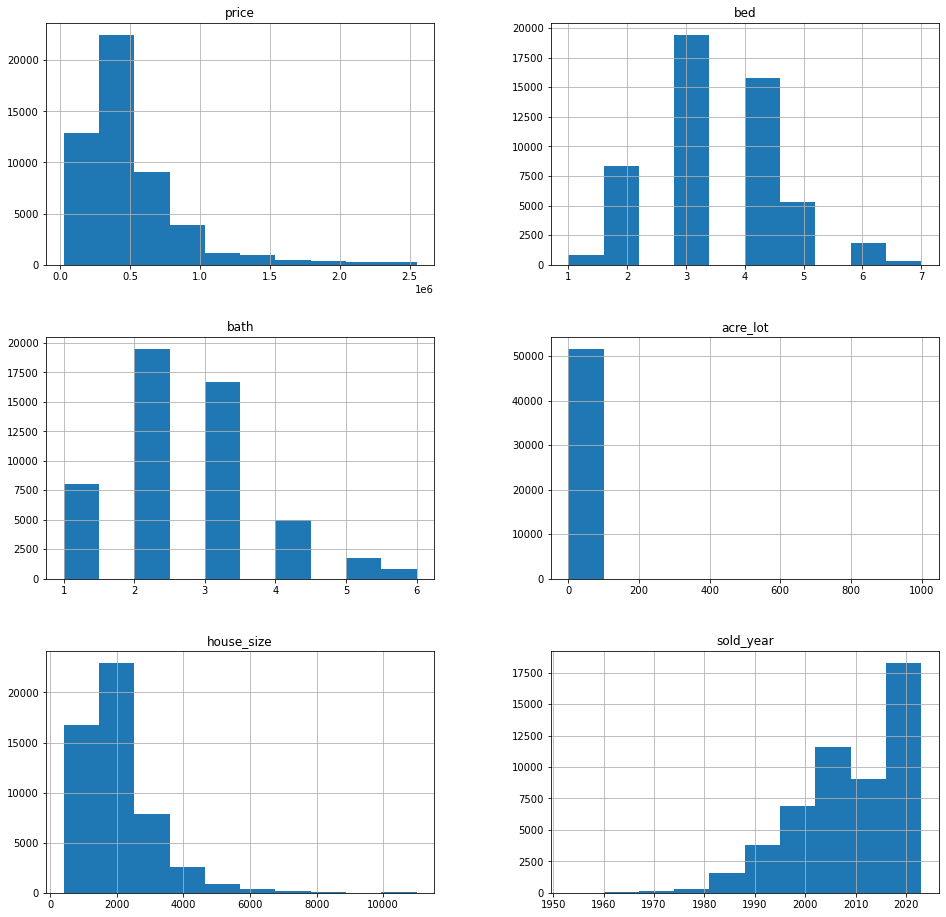

In [12]:
fig, axis = plt.subplots(3,2,figsize=(16, 16))
df2.hist(ax=axis, linestyle='-')

<AxesSubplot:>

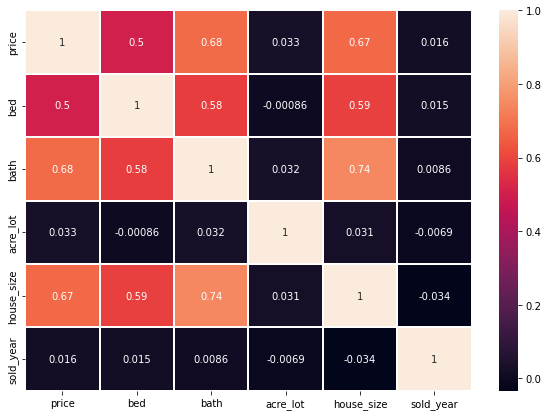

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df2.corr(), annot=True, linewidths=2)

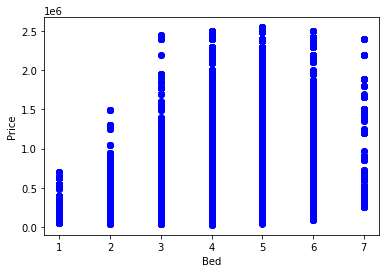

In [14]:
plt.scatter(df2.bed, df2.price, color='blue')
plt.xlabel("Bed")
plt.ylabel("Price")
plt.show()

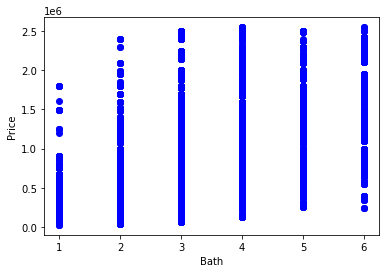

In [15]:
plt.scatter(df2.bath, df2.price, color='blue')
plt.xlabel("Bath")
plt.ylabel("Price")
plt.show()

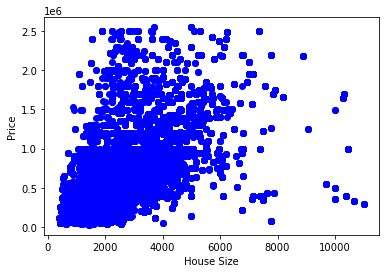

In [16]:
plt.scatter(df2.house_size, df2.price, color='blue')
plt.xlabel("House Size")
plt.ylabel("Price")
plt.show()

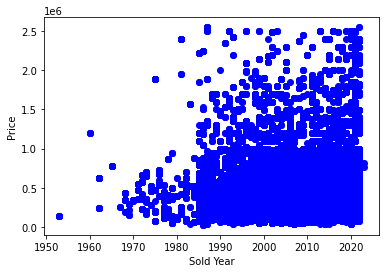

In [17]:
plt.scatter(df2.sold_year, df2.price, color='blue')
plt.xlabel("Sold Year")
plt.ylabel("Price")
plt.show()

## Creating train and test dataset

In [18]:
msk = np.random.rand(len(df2)) < 0.8
train = df2[msk]
test = df2[~msk]

### Train data distribution

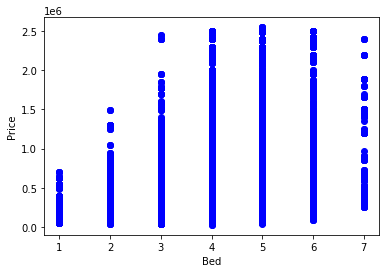

In [19]:
plt.scatter(train.bed, train.price, color='blue')
plt.xlabel("Bed")
plt.ylabel("Price")
plt.show()

## Multiple Regression Model

In [20]:
df2.head()

,price,bed,bath,acre_lot,house_size,sold_year
463568,339900.0,2.0,2.0,0.11,1456.0,1987
463569,305100.0,3.0,2.0,0.14,1542.0,2022
463572,325000.0,3.0,3.0,0.15,1870.0,2002
463575,440000.0,4.0,2.0,0.17,1842.0,2015
463577,399000.0,3.0,3.0,0.06,1476.0,1990


In [21]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['bed', 'bath', 'acre_lot', 'house_size', 'sold_year']])
y = np.asanyarray(train[['price']])
regr.fit(x, y)
print('Coefficients:', regr.coef_)

y_ =  regr.predict(test[['bed', 'bath', 'acre_lot', 'house_size', 'sold_year']])
x = np.asanyarray(test[['bed', 'bath', 'acre_lot', 'house_size', 'sold_year']])
y = np.asanyarray(test[['price']])
regr.fit(x, y)
print('Residual sum of square: %.2f' % np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients: [[2.67289426e+04 1.21141520e+05 1.68779723e+02 1.17138189e+02
  7.15022681e+02]]
Residual sum of square: 58409155935.76
Variance score: 0.54


C:\Users\ageng\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Regression Evaluation

In [22]:
X = df2[['bed', 'bath', 'acre_lot', 'house_size', 'sold_year']]
y = df2['price']

In [23]:
print("Feature set size:", X.shape)
print("Variable set size:",y.shape)

Feature set size: (51736, 5)
Variable set size: (51736,)


In [24]:
X.head()

,bed,bath,acre_lot,house_size,sold_year
463568,2.0,2.0,0.11,1456.0,1987
463569,3.0,2.0,0.14,1542.0,2022
463572,3.0,3.0,0.15,1870.0,2002
463575,4.0,2.0,0.17,1842.0,2015
463577,3.0,3.0,0.06,1476.0,1990


In [25]:
y.head()

463568    339900.0
463569    305100.0
463572    325000.0
463575    440000.0
463577    399000.0
Name: price, dtype: float64

### Test-train Split

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
lm = LinearRegression()
lm.fit(X_train, y_train)

print("The intercept term of the linear model:", lm.intercept_)
print("The coefficients of the linear model:", lm.coef_)
print("R-squared value of this fit:", round(metrics.r2_score(y_train, train_pred),3))

The intercept term of the linear model: -1697750.4488702095
The coefficients of the linear model: [2.82938846e+04 1.22872813e+05 3.44959536e+02 1.13792361e+02
 7.73070512e+02]
R-squared value of this fit: 0.529


In [28]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
bed,28293.884648
bath,122872.813211
acre_lot,344.959536
house_size,113.792361
sold_year,773.070512


#### Calculation of standard errors and t-statistic for the coefficients

In [29]:
n = X_train.shape[0]
k = X_train.shape[1]
dfN = n-k
train_pred = lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error = np.sum(train_error)
se = [0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r / np.sum(np.square(X_train[list(X_train.columns)[i]] - X_train[list(X_train.columns)[i]].mean()))
    se[i] = np.sqrt(r)
cdf['Standard Error'] = se
cdf['t-statistic'] = cdf['Coefficients'] / cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
bed,28293.884648,1196.830696,23.640674
bath,122872.813211,1196.851187,102.663401
acre_lot,344.959536,94.788745,3.639246
house_size,113.792361,1.180153,96.421719
sold_year,773.070512,121.421971,6.366809


In [38]:
print("Spesifikasi yang mempengaruhi harga rumah\n",'-'*90,sep="")
l = list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Spesifikasi yang mempengaruhi harga rumah
------------------------------------------------------------------------------------------
bath > 
house_size > 
bed > 
sold_year > 
acre_lot


Text(0.5, 1.0, 'sold_year vs. Price')

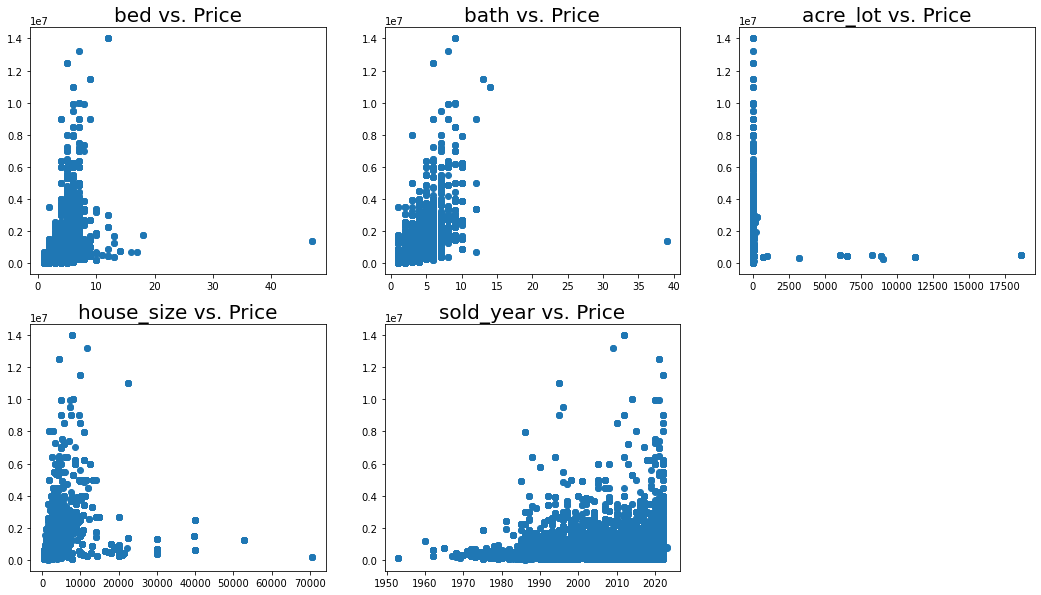

In [31]:
l = list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(2,3)
# f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]], df['price'])
ax0.set_title(l[0]+" vs. Price", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]], df['price'])
ax1.set_title(l[1]+" vs. Price", fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]], df['price'])
ax2.set_title(l[2]+" vs. Price", fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]], df['price'])
ax3.set_title(l[3]+" vs. Price", fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]], df['price'])
ax4.set_title(l[4]+" vs. Price", fontdict={'fontsize':20})

In [32]:
print("R-squared value of this fit:", round(metrics.r2_score(y_train, train_pred),3))

R-squared value of this fit: 0.529


Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (15521,)


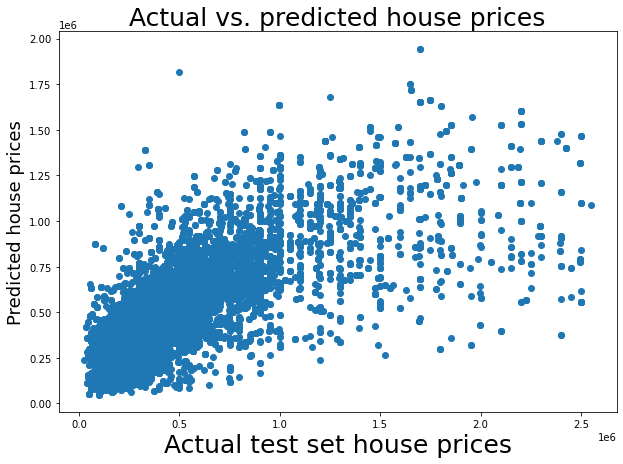

In [33]:
predictions = lm.predict(X_test)
print("Type of the predicted object:", type(predictions))
print("Size of the predicted object:", predictions.shape)

plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices", fontsize=25)
plt.xlabel("Actual test set house prices", fontsize=25)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test, y=predictions)

C:\Users\ageng\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

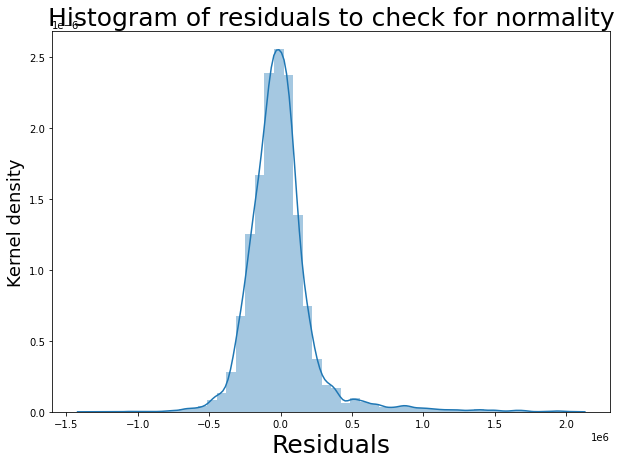

In [34]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality", fontsize=25)
plt.xlabel("Residuals", fontsize=25)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot([y_test-predictions])

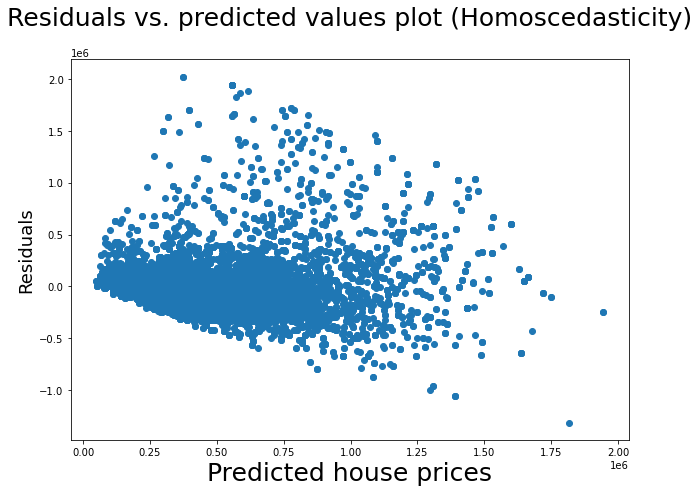

In [35]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n", fontsize=25)
plt.xlabel("Predicted house prices", fontsize=25)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions, y=y_test-predictions)

In [36]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test, predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test, predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean absolute error (MAE): 154864.71467938795
Mean square error (MSE): 59401569347.78594
Root mean square error (RMSE): 243724.37167379455


In [37]:
print("R-squared value of predictions:", round(metrics.r2_score(y_test, predictions),3))

R-squared value of predictions: 0.53
